# Data Preparation

## Import Libraries

In [15]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import os

import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVR, SVR
from sklearn.metrics import mean_absolute_error
pd.options.display.precision = 15
from sklearn import preprocessing
import lightgbm as lgb
import xgboost as xgb
import time
import datetime
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold, GroupKFold, GridSearchCV, train_test_split, TimeSeriesSplit
from sklearn import metrics
from sklearn import linear_model
import gc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.utils import resample
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter 
from numpy import where
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN

from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks

import eli5
import shap
from IPython.display import HTML
import json
import altair as alt

import networkx as nx

## Import Data

In [2]:
loan_data_backup = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\zleng\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [277]:
loan_data = loan_data_backup.copy()

## Explore Data

In [278]:
pd.options.display.max_columns = None

In [279]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.650000000000000,162.870000000000005,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.649999999999999,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.700000000000003,9.0,f,0.000000000000000,0.000000000000000,5861.071414000000004,5831.779999999999745,5000.000000000000000,861.070000000000050,0.000000000000000,0.000000000000000,0.00,Jan-15,171.620000000000005,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.270000000000000,59.829999999999998,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000000000000000,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.400000000000000,4.0,f,0.000000000000000,0.000000000000000,1008.710000000000036,1008.710000000000036,456.459999999999980,435.170000000000016,0.000000000000000,117.079999999999998,1.11,Apr-13,119.659999999999997,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.960000000000001,84.329999999999998,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.720000000000001,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.500000000000000,10.0,f,0.000000000000000,0.000000000000000,3003.653643999999986,3003.650000000000091,2400.000000000000000,603.649999999999977,0.000000000000000,0.000000000000000,0.00,Jun-14,649.909999999999968,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.490000000000000,339.310000000000002,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.000000000000000,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.000000000000000,37.0,f,0.000000000000000,0.000000000000000,12226.302209999999832,12226.299999999999272,10000.000000000000000,2209.329999999999927,16.969999999999999,0.000000000000000,0.00,Jan-15,357.480000000000018,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.690000000000000,67.790000000000006,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.940000000000001,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.899999999999999,38.0,f,766.899999999999977,766.8999999999

In [280]:
#loan_data.columns.values

In [281]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [282]:
# this will be used for WOE transformation later 
cat_list = []
for col in loan_data.columns:
    if loan_data[col].dtype == 'object':
        cat_list.append(col)

print(cat_list)

['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type']


In [283]:
def summary_table(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values   
    summary['Missing_Percentage'] = summary['Missing']*100/df.shape[0]
    summary['Missing_Percentage'] = round(summary['Missing_Percentage'], 2)
    summary['Uniques'] = df.nunique().values
    #summary['One_Value_Var'] = summary[summary['Uniques'] == 1]
    #summary['Min'] = df.min()
    #summary['Max'] = df.max()
    #summary['Scale'] = df.max() - df.min() 
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [284]:
summary_table(loan_data)

Dataset Shape: (466285, 75)


,Name,dtypes,Missing,Missing_Percentage,Uniques,First Value,Second Value,Third Value,Entropy
0,Unnamed: 0,int64,0,0.000000000000000,466285,0,1,2,18.829999999999998
1,id,int64,0,0.000000000000000,466285,1077501,1077430,1077175,18.829999999999998
2,member_id,int64,0,0.000000000000000,466285,1296599,1314167,1313524,18.829999999999998
3,loan_amnt,int64,0,0.000000000000000,1352,5000,2500,2400,7.140000000000000
4,funded_amnt,int64,0,0.000000000000000,1354,5000,2500,2400,7.160000000000000
5,funded_amnt_inv,float64,0,0.000000000000000,9854,4975,2500,2400,7.950000000000000
6,term,object,0,0.000000000000000,2,36 months,60 months,36 months,0.850000000000000
7,int_rate,float64,0,0.000000000000000,506,10.65,15.27,15.96,7.010000000000000
8,installment,float64,0,0.000000000000000,55622,162.87,59.83,84.33,13.710000000000001
9,grade,object,0,0.000000000000000,7,B,C,C,2.360000000000000


In [285]:
#loan_data.dtypes.values

## General Preprocessing

## Dependent Variable 

In [286]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [287]:
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [288]:

loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current                                                0.480877574873736
Fully Paid                                             0.396193315247113
Charged Off                                            0.091092357678244
Late (31-120 days)                                     0.014797816785871
In Grace Period                                        0.006746946609906
Does not meet the credit policy. Status:Fully Paid     0.004263486923234
Late (16-30 days)                                      0.002612136354376
Default                                                0.001784316458818
Does not meet the credit policy. Status:Charged Off    0.001632049068703
Name: loan_status, dtype: float64

In [289]:
#0: Bad custoer; 1: Good customer 
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                               'Does not meet the credit policy. Status:Charged Off',
                                                               'Late (31-120 days)']), 0, 1)

In [309]:
loan_data['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int32

### Preprocessing few continuous variables

In [290]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [291]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',  str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')

In [292]:
loan_data['emp_length_int']

0         10
1          0
2         10
3         10
4          1
          ..
466280     4
466281    10
466282     7
466283     3
466284    10
Name: emp_length_int, Length: 466285, dtype: object

In [293]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [294]:
loan_data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [295]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

In [296]:
loan_data['earliest_cr_line_date'][0]

Timestamp('1985-01-01 00:00:00')

In [297]:
pd.to_datetime('2018-01-01') - loan_data['earliest_cr_line_date']

0        12053 days
1         6850 days
2         5905 days
3         8005 days
4         8036 days
            ...    
466280    5389 days
466281    7519 days
466282    5875 days
466283    5448 days
466284    6544 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [298]:
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [299]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000000000000
mean        239.482430252908273
std          93.974828661371532
min        -612.000000000000000
25%         183.000000000000000
50%         225.000000000000000
75%         285.000000000000000
max         587.000000000000000
Name: mths_since_earliest_cr_line, dtype: float64

In [300]:

loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
...,...,...,...
464003,Jan-68,2068-01-01,-601.0
464260,Jul-66,2066-07-01,-583.0
465100,Oct-67,2067-10-01,-598.0
465500,Sep-67,2067-09-01,-597.0


### It appears the early years were incorrectly converted to future times.

One way to tackle the issue is to convert the negative values to max values 

In [301]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()

In [302]:
min(loan_data['mths_since_earliest_cr_line'])

73.0

In [303]:
loan_data['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
466280     60 months
466281     60 months
466282     60 months
466283     36 months
466284     36 months
Name: term, Length: 466285, dtype: object

In [304]:
loan_data['term'].describe()

count         466285
unique             2
top        36 months
freq          337953
Name: term, dtype: object

In [305]:
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')

In [306]:
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])
loan_data['term_int']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term_int, Length: 466285, dtype: int64

In [307]:
loan_data['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [308]:
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d_date']) / np.timedelta64(1, 'M')), 2)
loan_data['mths_since_issue_d'].describe()

count    466285.000000000000000
mean         51.265104860693832
std          14.338833641255288
min          36.009999999999998
25%          41.039999999999999
50%          46.979999999999997
75%          57.039999999999999
max         126.030000000000001
Name: mths_since_issue_d, dtype: float64

### Preprocessing few discrete variables

In [310]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [311]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [312]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

### Check for missing values and clean

In [313]:
pd.options.display.max_rows = None
loan_data.isnull().sum().sort_values(ascending=False)

total_bal_il                                                       466285
open_rv_12m                                                        466285
inq_last_12m                                                       466285
total_cu_tl                                                        466285
inq_fi                                                             466285
all_util                                                           466285
max_bal_bc                                                         466285
open_rv_24m                                                        466285
annual_inc_joint                                                   466285
dti_joint                                                          466285
verification_status_joint                                          466285
open_acc_6m                                                        466285
open_il_6m                                                         466285
open_il_12m                           

In [314]:
many_null_cols = [col for col in loan_data.columns if loan_data[col].isnull().sum() / loan_data.shape[0] > 0.85]
print(many_null_cols)

['mths_since_last_record', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


In [315]:
loan_data = loan_data.drop(many_null_cols, axis = 1)

In [316]:
null_list = loan_data.isnull().sum().sort_values(ascending=False)

In [317]:
null_list

mths_since_last_major_derog                                        367311
desc                                                               340302
mths_since_last_delinq                                             250351
next_pymnt_d                                                       227214
total_rev_hi_lim                                                    70276
tot_coll_amt                                                        70276
tot_cur_bal                                                         70276
emp_title                                                           27588
emp_length                                                          21008
emp_length_int                                                      21008
last_pymnt_d                                                          376
revol_util                                                            340
collections_12_mths_ex_med                                            145
last_credit_pull_d                    

In [318]:
null_variables = []
for k, v in null_list.items():
    if v>0:
        null_variables.append(k)

In [319]:
null_variables

['mths_since_last_major_derog',
 'desc',
 'mths_since_last_delinq',
 'next_pymnt_d',
 'total_rev_hi_lim',
 'tot_coll_amt',
 'tot_cur_bal',
 'emp_title',
 'emp_length',
 'emp_length_int',
 'last_pymnt_d',
 'revol_util',
 'collections_12_mths_ex_med',
 'last_credit_pull_d',
 'delinq_2yrs',
 'mths_since_earliest_cr_line',
 'total_acc',
 'pub_rec',
 'open_acc',
 'acc_now_delinq',
 'earliest_cr_line',
 'earliest_cr_line_date',
 'inq_last_6mths',
 'title',
 'annual_inc']

In [320]:
for col in loan_data.columns:
    if loan_data[col].dtype == 'object':
        le = LabelEncoder()
        le.fit(list(loan_data[col].astype(str).values))
        loan_data[col] = le.transform(list(loan_data[col].astype(str).values)) 
        

In [321]:
date_variables = [d for d in loan_data.columns if loan_data[d].dtype == 'datetime64[ns]']

In [322]:
date_variables 

['earliest_cr_line_date', 'issue_d_date']

In [323]:
date_table = loan_data[['earliest_cr_line_date', 'issue_d_date']]

In [324]:
date_table.head()

,earliest_cr_line_date,issue_d_date
0,1985-01-01,2011-12-01
1,1999-04-01,2011-12-01
2,2001-11-01,2011-12-01
3,1996-02-01,2011-12-01
4,1996-01-01,2011-12-01


In [325]:
loan_data = loan_data.drop(['earliest_cr_line_date', 'issue_d_date'], axis = 1 )

In [326]:
columns = loan_data.columns

In [327]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(loan_data)
loan_data = imputer.transform(loan_data)

In [328]:
loan_data = pd.DataFrame(loan_data, columns = columns)

In [329]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad,emp_length_int,mths_since_earliest_cr_line,term_int,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0.0,1077501.0,1296599.0,5000.0,5000.0,4975.0,0.0,10.650000000000000,162.870000000000005,1.0,6.0,193154.0,1.0,5.0,24000.0,2.0,19.0,5.0,0.0,21253.0,113399.0,1.0,8851.0,764.0,3.0,27.649999999999999,0.0,261.0,1.0,34.10443005733233,3.0,0.0,13648.0,83.700000000000003,9.0,0.0,0.000000000000000,0.000000000000000,5861.071414000000004,5831.779999999999745,5000.000000000000000,861.070000000000050,0.000000000000000,0.000000000000000,0.00,40.0,171.620000000000005,100.0,41.0,0.0,42.85254713359064,1.0,0.0,0.0,191.913517117035212,138801.713385301845847,30379.087770732483477,1.0,10.0,395.0,36.0,72.019999999999996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1077430.0,1314167.0,2500.0,2500.0,2

In [330]:
loan_data = pd.concat([date_table, loan_data], axis = 1)

In [331]:
loan_data.head()

,earliest_cr_line_date,issue_d_date,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad,emp_length_int,mths_since_earliest_cr_line,term_int,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,1985-01-01,2011-12-01,0.0,1077501.0,1296599.0,5000.0,5000.0,4975.0,0.0,10.650000000000000,162.870000000000005,1.0,6.0,193154.0,1.0,5.0,24000.0,2.0,19.0,5.0,0.0,21253.0,113399.0,1.0,8851.0,764.0,3.0,27.649999999999999,0.0,261.0,1.0,34.10443005733233,3.0,0.0,13648.0,83.700000000000003,9.0,0.0,0.000000000000000,0.000000000000000,5861.071414000000004,5831.779999999999745,5000.000000000000000,861.070000000000050,0.000000000000000,0.000000000000000,0.00,40.0,171.620000000000005,100.0,41.0,0.0,42.85254713359064,1.0,0.0,0.0,191.913517117035212,138801.713385301845847,30379.087770732483477,1.0,10.0,395.0,36.0,72.019999999999996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

## Visualizaiton 

In [333]:
pd.options.display.max_rows = 100

In [335]:
print(list(loan_data.columns))

['earliest_cr_line_date', 'issue_d_date', 'Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'good_bad', 'emp_length_int', 'mths_since_earliest_cr_line', 'ter

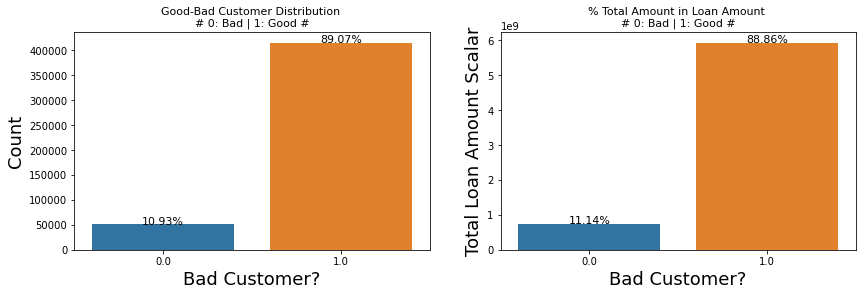

In [339]:
loan_data['loan_amnt'] = loan_data['loan_amnt'].astype(float)
total = len(loan_data)
total_amt = loan_data.groupby(['good_bad'])['loan_amnt'].sum().sum()
plt.figure(figsize=(14,4))

plt.subplot(121)
g = sns.countplot(x='good_bad', data=loan_data, )
g.set_title("Good-Bad Customer Distribution \n# 0: Bad | 1: Good #", fontsize=11)
g.set_xlabel("Bad Customer?", fontsize=18)
g.set_ylabel('Count', fontsize=18)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=11) 

perc_amt = (loan_data.groupby(['good_bad'])['loan_amnt'].sum())
perc_amt = perc_amt.reset_index()
plt.subplot(122)
g1 = sns.barplot(x='good_bad', y='loan_amnt',  dodge=True, data=perc_amt)
g1.set_title("% Total Amount in Loan Amount \n# 0: Bad | 1: Good #", fontsize=11)
g1.set_xlabel("Bad Customer?", fontsize=18)
g1.set_ylabel('Total Loan Amount Scalar', fontsize=18)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_amt * 100),
            ha="center", fontsize=11) 
    
plt.show()  

The dataset is highly imbalanced.  Resampling will be applied to tackle with the imbalance. 

In [340]:
loan_data.shape

(466285, 190)

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

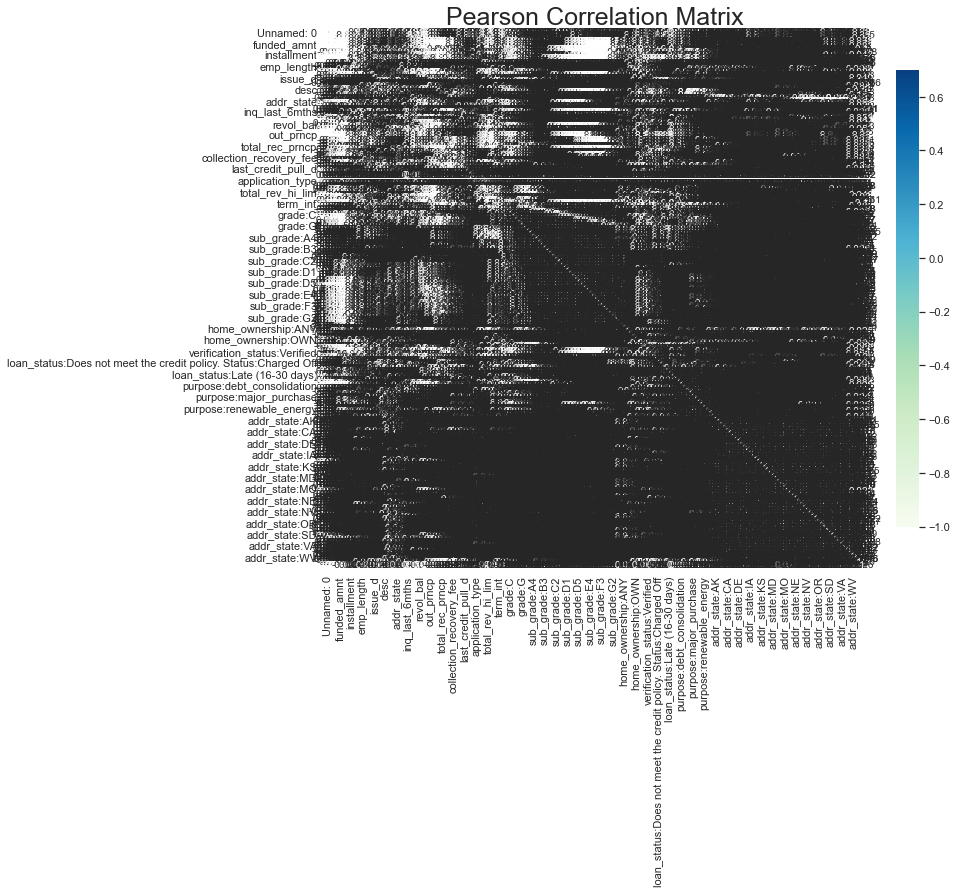

In [341]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(12,12))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(loan_data.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":10}, cbar_kws={"shrink": .7})

# PD model

In [400]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0.0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1.0)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [402]:
dset, iv = calculate_woe_iv(loan_data, 'grade', 'good_bad')

In [406]:
for col in loan_data.columns:
    if col == 'good_bad': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df, iv = calculate_woe_iv(loan_data, col, 'good_bad')
        #print(df)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: earliest_cr_line_date
IV score: 0.03


WoE and IV for column: issue_d_date
IV score: 0.12


WoE and IV for column: Unnamed: 0


KeyboardInterrupt: 

In [403]:
iv

0.29078213954085946

## Data preparation

### Splitting Data

In [344]:
X_train, X_test, y_train, y_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 42)

In [397]:
print(X_train.columns)

Index(['earliest_cr_line_date', 'issue_d_date', 'Unnamed: 0', 'id',
       'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate',
       ...
       'addr_state:TX', 'addr_state:UT', 'addr_state:VA', 'addr_state:VT',
       'addr_state:WA', 'addr_state:WI', 'addr_state:WV', 'addr_state:WY',
       'initial_list_status:f', 'initial_list_status:w'],
      dtype='object', length=189)


In [395]:
summary_table(X_train)

Dataset Shape: (373028, 189)


,Name,dtypes,Missing,Missing_Percentage,Uniques,First Value,Second Value,Third Value,Entropy
0,earliest_cr_line_date,datetime64[ns],24,0.01,659,1985-01-01 00:00:00,1999-04-01 00:00:00,2001-11-01 00:00:00,8.330000000000000
1,issue_d_date,datetime64[ns],0,0.00,91,2011-12-01 00:00:00,2011-12-01 00:00:00,2011-12-01 00:00:00,5.350000000000000
2,Unnamed: 0,float64,0,0.00,373028,0,1,2,18.510000000000002
3,id,float64,0,0.00,373028,1077501,1077430,1077175,18.510000000000002
4,member_id,float64,0,0.00,373028,1296599,1314167,1313524,18.510000000000002
...,...,...,...,...,...,...,...,...,...
184,addr_state:WI,float64,0,0.00,2,0,0,0,0.100000000000000
185,addr_state:WV,float64,0,0.00,2,0,0,0,0.050000000000000
186,addr_state:WY,float64,0,0.00,2,0,0,0,0.020000000000000
187,initial_list_status:f,float64,0,0.00,2,1,1,1,0.930000000000000


### Data Preparation: WOE 

In [348]:
#df_inputs_prepr = loan_data_inputs_train
#df_targets_prepr = loan_data_targets_train
X_prepr = X_test
y_prepr = y_test

In [349]:
X_prepr['grade'].unique()

array([2., 4., 0., 3., 1., 5., 6.])

In [350]:
df1 = pd.concat([X_prepr['grade'], y_prepr], axis = 1)
df1.head()

,grade,good_bad
362514,2.0,1.0
288564,4.0,1.0
213591,2.0,1.0
263083,2.0,1.0
165001,0.0,1.0


In [351]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()

,grade,good_bad
0,0.0,15108
1,1.0,27199
2,2.0,25048
3,3.0,15390
4,4.0,7145
5,5.0,2699
6,6.0,668


In [352]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()

,grade,good_bad
0,0.0,0.962337834259995
1,1.0,0.923085407551748
2,2.0,0.882904822740339
3,3.0,0.844314489928525
4,4.0,0.805178446466060
5,5.0,0.775472397184142
6,6.0,0.697604790419162


In [353]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)

In [354]:
df1

,grade,good_bad,grade,good_bad
0,0.0,15108,0.0,0.962337834259995
1,1.0,27199,1.0,0.923085407551748
2,2.0,25048,2.0,0.882904822740339
3,3.0,15390,3.0,0.844314489928525
4,4.0,7145,4.0,0.805178446466060
5,5.0,2699,5.0,0.775472397184142
6,6.0,668,6.0,0.697604790419162


In [355]:
df1 = df1.iloc[: , [0, 1, 3]]
df1

,grade,good_bad,good_bad
0,0.0,15108,0.962337834259995
1,1.0,27199,0.923085407551748
2,2.0,25048,0.882904822740339
3,3.0,15390,0.844314489928525
4,4.0,7145,0.805178446466060
5,5.0,2699,0.775472397184142
6,6.0,668,0.697604790419162


In [356]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

,grade,n_obs,prop_good
0,0.0,15108,0.962337834259995
1,1.0,27199,0.923085407551748
2,2.0,25048,0.882904822740339
3,3.0,15390,0.844314489928525
4,4.0,7145,0.805178446466060
5,5.0,2699,0.775472397184142
6,6.0,668,0.697604790419162


In [357]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()

In [358]:
df1

,grade,n_obs,prop_good,prop_n_obs
0,0.0,15108,0.962337834259995,0.162003924638365
1,1.0,27199,0.923085407551748,0.291656390405010
2,2.0,25048,0.882904822740339,0.268591097719206
3,3.0,15390,0.844314489928525,0.165027826329391
4,4.0,7145,0.805178446466060,0.076616232561631
5,5.0,2699,0.775472397184142,0.028941527177585
6,6.0,668,0.697604790419162,0.007163001168813


In [359]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,0.0,15108,0.962337834259995,0.162003924638365,14539.0,568.999999999999318
1,1.0,27199,0.923085407551748,0.291656390405010,25107.0,2092.000000000001364
2,2.0,25048,0.882904822740339,0.268591097719206,22115.0,2933.000000000000000
3,3.0,15390,0.844314489928525,0.165027826329391,12994.0,2396.000000000000455
4,4.0,7145,0.805178446466060,0.076616232561631,5753.0,1392.000000000000000
5,5.0,2699,0.775472397184142,0.028941527177585,2093.0,606.000000000000000
6,6.0,668,0.697604790419162,0.007163001168813,466.0,202.000000000000000


In [360]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,0.0,15108,0.962337834259995,0.162003924638365,14539.0,568.999999999999318,0.175027387530548,0.055839057899902
1,1.0,27199,0.923085407551748,0.291656390405010,25107.0,2092.000000000001364,0.302249990971144,0.205299313052012
2,2.0,25048,0.882904822740339,0.268591097719206,22115.0,2933.000000000000000,0.266230873872898,0.287831207065751
3,3.0,15390,0.844314489928525,0.165027826329391,12994.0,2396.000000000000455,0.156427943708091,0.235132482826300
4,4.0,7145,0.805178446466060,0.076616232561631,5753.0,1392.000000000000000,0.069257346479348,0.136604514229637
5,5.0,2699,0.775472397184142,0.028941527177585,2093.0,606.000000000000000,0.025196528103820,0.059470068694799
6,6.0,668,0.697604790419162,0.007163001168813,466.0,202.000000000000000,0.005609929334152,0.019823356231600


In [361]:
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,0.0,15108,0.962337834259995,0.162003924638365,14539.0,568.999999999999318,0.175027387530548,0.055839057899902,1.142468874961501
1,1.0,27199,0.923085407551748,0.291656390405010,25107.0,2092.000000000001364,0.302249990971144,0.205299313052012,0.386785481672575
2,2.0,25048,0.882904822740339,0.268591097719206,22115.0,2933.000000000000000,0.266230873872898,0.287831207065751,-0.078010342518619
3,3.0,15390,0.844314489928525,0.165027826329391,12994.0,2396.000000000000455,0.156427943708091,0.235132482826300,-0.407553631638459
4,4.0,7145,0.805178446466060,0.076616232561631,5753.0,1392.000000000000000,0.069257346479348,0.136604514229637,-0.679260767874666
5,5.0,2699,0.775472397184142,0.028941527177585,2093.0,606.000000000000000,0.025196528103820,0.059470068694799,-0.858766927466910
6,6.0,668,0.697604790419162,0.007163001168813,466.0,202.000000000000000,0.005609929334152,0.019823356231600,-1.262322727119154


In [362]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,6.0,668,0.697604790419162,0.007163001168813,466.0,202.000000000000000,0.005609929334152,0.019823356231600,-1.262322727119154
1,5.0,2699,0.775472397184142,0.028941527177585,2093.0,606.000000000000000,0.025196528103820,0.059470068694799,-0.858766927466910
2,4.0,7145,0.805178446466060,0.076616232561631,5753.0,1392.000000000000000,0.069257346479348,0.136604514229637,-0.679260767874666
3,3.0,15390,0.844314489928525,0.165027826329391,12994.0,2396.000000000000455,0.156427943708091,0.235132482826300,-0.407553631638459
4,2.0,25048,0.882904822740339,0.268591097719206,22115.0,2933.000000000000000,0.266230873872898,0.287831207065751,-0.078010342518619
5,1.0,27199,0.923085407551748,0.291656390405010,25107.0,2092.000000000001364,0.302249990971144,0.205299313052012,0.386785481672575
6,0.0,15108,0.962337834259995,0.162003924638365,14539.0,568.999999999999318,0.175027387530548,0.055839057899902,1.142468874961501


In [363]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,6.0,668,0.697604790419162,0.007163001168813,466.0,202.000000000000000,0.005609929334152,0.019823356231600,-1.262322727119154,NaN,NaN
1,5.0,2699,0.775472397184142,0.028941527177585,2093.0,606.000000000000000,0.025196528103820,0.059470068694799,-0.858766927466910,0.077867606764981,0.403555799652244
2,4.0,7145,0.805178446466060,0.076616232561631,5753.0,1392.000000000000000,0.069257346479348,0.136604514229637,-0.679260767874666,0.029706049281918,0.179506159592243
3,3.0,15390,0.844314489928525,0.165027826329391,12994.0,2396.000000000000455,0.156427943708091,0.235132482826300,-0.407553631638459,0.039136043462465,0.271707136236208
4,2.0,25048,0.882904822740339,0.268591097719206,22115.0,2933.000000000000000,0.266230873872898,0.287831207065751,-0.078010342518619,0.038590332811814,0.329543289119840
5,1.0,27199,0.923085407551748,0.291656390405010,25107.0,2092.000000000001364,0.302249990971144,0.205299313052012,0.386785481672575,0.040180584811410,0.464795824191194
6,0.0,15108,0.962337834259995,0.162003924638365,14539.0,568.999999999999318,0.175027387530548,0.055839057899902,1.142468874961501,0.039252426708247,0.755683393288926


In [364]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,6.0,668,0.697604790419162,0.007163001168813,466.0,202.000000000000000,0.005609929334152,0.019823356231600,-1.262322727119154,NaN,NaN,0.300550645483914
1,5.0,2699,0.775472397184142,0.028941527177585,2093.0,606.000000000000000,0.025196528103820,0.059470068694799,-0.858766927466910,0.077867606764981,0.403555799652244,0.300550645483914
2,4.0,7145,0.805178446466060,0.076616232561631,5753.0,1392.000000000000000,0.069257346479348,0.136604514229637,-0.679260767874666,0.029706049281918,0.179506159592243,0.300550645483914
3,3.0,15390,0.844314489928525,0.165027826329391,12994.0,2396.000000000000455,0.156427943708091,0.235132482826300,-0.407553631638459,0.039136043462465,0.271707136236208,0.300550645483914
4,2.0,25048,0.882904822740339,0.268591097719206,22115.0,2933.000000000000000,0.266230873872898,0.287831207065751,-0.078010342518619,0.038590332811814,0.329543289119840,0.300550645483914
5,1.0,27199,0.923085407551748,0.291656390405010,25107.0,2092.000000000001364,0.302249990971144,0.205299313052012,0.386785481672575,0.040180584811410,0.464795824191194,0.300550645483914
6,0.0,15108,0.962337834259995,0.162003924638365,14539.0,568.999999999999318,0.175027387530548,0.055839057899902,1.142468874961501,0.039252426708247,0.755683393288926,0.300550645483914


### Preprocessing Discrete Variables: Automating Calculaions

In [365]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [367]:
df_temp = woe_discrete(X_prepr, 'grade', y_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,6.0,668,0.697604790419162,0.007163001168813,466.0,202.000000000000000,0.005609929334152,0.019823356231600,-1.262322727119154,NaN,NaN,0.300550645483914
1,5.0,2699,0.775472397184142,0.028941527177585,2093.0,606.000000000000000,0.025196528103820,0.059470068694799,-0.858766927466910,0.077867606764981,0.403555799652244,0.300550645483914
2,4.0,7145,0.805178446466060,0.076616232561631,5753.0,1392.000000000000000,0.069257346479348,0.136604514229637,-0.679260767874666,0.029706049281918,0.179506159592243,0.300550645483914
3,3.0,15390,0.844314489928525,0.165027826329391,12994.0,2396.000000000000455,0.156427943708091,0.235132482826300,-0.407553631638459,0.039136043462465,0.271707136236208,0.300550645483914
4,2.0,25048,0.882904822740339,0.268591097719206,22115.0,2933.000000000000000,0.266230873872898,0.287831207065751,-0.078010342518619,0.038590332811814,0.329543289119840,0.300550645483914
5,1.0,27199,0.923085407551748,0.291656390405010,25107.0,2092.000000000001364,0.302249990971144,0.205299313052012,0.386785481672575,0.040180584811410,0.464795824191194,0.300550645483914
6,0.0,15108,0.962337834259995,0.162003924638365,14539.0,568.999999999999318,0.175027387530548,0.055839057899902,1.142468874961501,0.039252426708247,0.755683393288926,0.300550645483914


### Preprocessing Discrete Variables: Visualizing Results

In [368]:

sns.set()

In [369]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

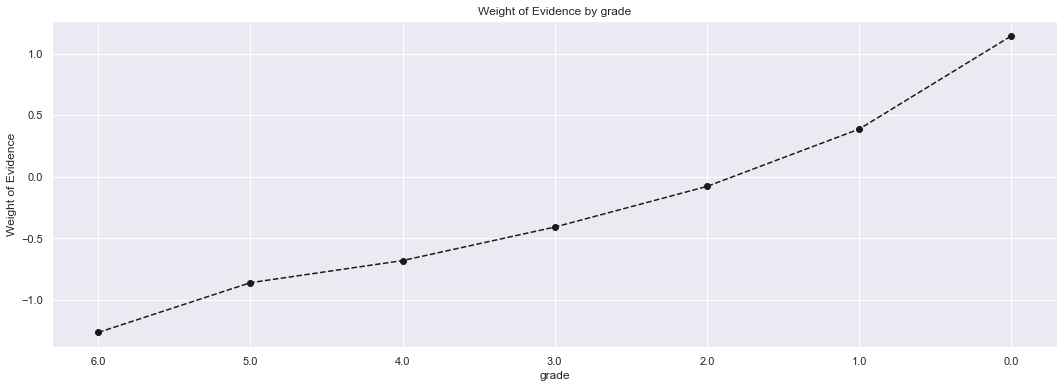

In [370]:
plot_by_woe(df_temp)

In [372]:
cat_list

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [383]:
for cat in cat_list:
    woe_discrete(X_prepr, cat, y_prepr)
    

In [385]:
X_prepr.head()

,earliest_cr_line_date,issue_d_date,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,emp_length_int,mths_since_earliest_cr_line,term_int,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
362514,2002-04-01,2014-07-01,362514.0,19677589.0,21900299.0,32500.0,32500.0,32500.0,1.0,14.990000000000000,773.009999999999991,2.0,14.0,89279.0,10.0,1.0,65000.0,2.0,44.0,5.0,0.0,160364.0,124225.0,4.0,25634.0,841.0,4.0,9.320000000000000,0.0,2.0,0.0,34.10443005733233,7.0,0.0,1208.0,4.300000000000000,20.0,0.0,0.000000000000000,0.000000000000000,38213.559999999997672,38213.559999999997672,32500.000000000000000,5713.560000000000400,0.0,0.0,0.0,89.0,27391.419999999998254,100.0,93.0,0.0,42.85254713359064,1.0,0.0,0.0,0.000000000000000,6563.000000000000000,25100.000000000000000,0.0,188.0,60.0,41.039999999999999,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
288564,2003

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 1

In [386]:
df_temp = woe_discrete(X_prepr, 'home_ownership', y_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,3.0,45,0.777777777777778,0.000482537503887,35.0,10.000000000000000,0.000421346623810,0.000981354268891,-0.845477695348227,NaN,NaN,0.022937648462389
1,2.0,10,0.800000000000000,0.000107230556419,8.0,2.000000000000000,0.000096307799728,0.000196270853778,-0.711946302723704,0.022222222222222,0.133531392624523,0.022937648462389
2,5.0,37874,0.874003274013835,0.406125009382674,33102.0,4771.999999999999091,0.398497598324244,0.468302257114818,-0.161412464560916,0.074003274013835,0.550533838162788,0.022937648462389
3,4.0,8409,0.888571768343442,0.090170174893038,7472.0,937.000000000000114,0.089951484945887,0.091952894995093,-0.022005966173339,0.014568494329606,0.139406498387577,0.022937648462389
4,1.0,46919,0.904750740638121,0.503115047663982,42450.0,4469.000000000000909,0.511033262306331,0.438567222767419,0.152921578962447,0.016178972294679,0.174927545135785,0.022937648462389


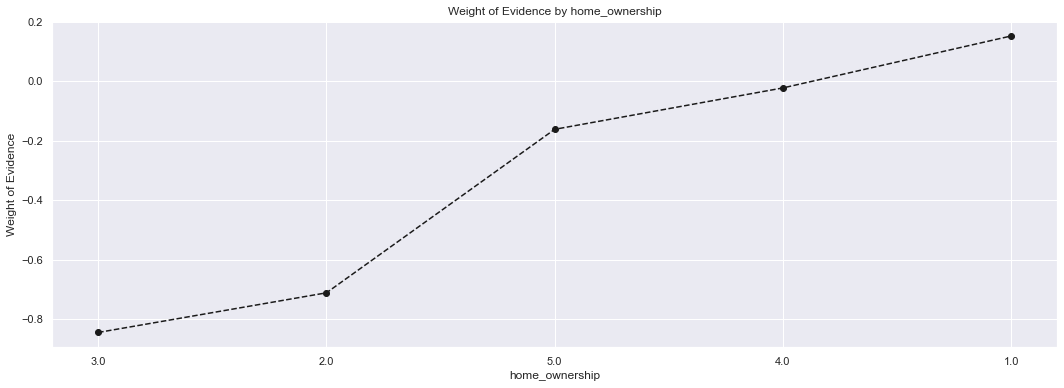

In [387]:
plot_by_woe(df_temp)

In [388]:
X_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([X_prepr['home_ownership:RENT'], X_prepr['home_ownership:OTHER'],
                                                            X_prepr['home_ownership:NONE'], X_prepr['home_ownership:ANY']])

In [389]:
X_prepr['home_ownership:RENT_OTHER_NONE_ANY'] 

362514    0.0
288564    0.0
213591    0.0
263083    0.0
165001    0.0
         ... 
115       0.0
296284    1.0
61777     0.0
91763     0.0
167512    1.0
Name: home_ownership:RENT_OTHER_NONE_ANY, Length: 93257, dtype: float64

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 2

In [ ]:
df_inputs_prepr['addr_state'].unique()

In [ ]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

In [ ]:
plot_by_woe(df_temp)

In [ ]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

In [ ]:
plot_by_woe(df_temp.iloc[2: -2, :])

In [ ]:
plot_by_woe(df_temp.iloc[6: -6, :])

In [ ]:
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                                         df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                                         df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                         df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

### Preprocessing Discrete Variables: Homework

In [ ]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

In [ ]:
plot_by_woe(df_temp)

In [ ]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [ ]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

In [ ]:
plot_by_woe(df_temp)

### Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [390]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

In [391]:
X_prepr['term_int'].unique()

array([60., 36.])

In [396]:
df_temp = woe_ordered_continuous(X_prepr, 'grade', y_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,15108,0.962337834259995,0.162003924638365,14539.0,568.999999999999318,0.175027387530548,0.055839057899902,1.142468874961501,NaN,NaN,0.300550645483914
1,1.0,27199,0.923085407551748,0.291656390405010,25107.0,2092.000000000001364,0.302249990971144,0.205299313052012,0.386785481672575,0.039252426708247,0.755683393288926,0.300550645483914
2,2.0,25048,0.882904822740339,0.268591097719206,22115.0,2933.000000000000000,0.266230873872898,0.287831207065751,-0.078010342518619,0.040180584811410,0.464795824191194,0.300550645483914
3,3.0,15390,0.844314489928525,0.165027826329391,12994.0,2396.000000000000455,0.156427943708091,0.235132482826300,-0.407553631638459,0.038590332811814,0.329543289119840,0.300550645483914
4,4.0,7145,0.805178446466060,0.076616232561631,5753.0,1392.000000000000000,0.069257346479348,0.136604514229637,-0.679260767874666,0.039136043462465,0.271707136236208,0.300550645483914
5,5.0,2699,0.775472397184142,0.028941527177585,2093.0,606.000000000000000,0.025196528103820,0.059470068694799,-0.858766927466910,0.029706049281918,0.179506159592243,0.300550645483914
6,6.0,668,0.697604790419162,0.007163001168813,466.0,202.000000000000000,0.005609929334152,0.019823356231600,-1.262322727119154,0.077867606764981,0.403555799652244,0.300550645483914


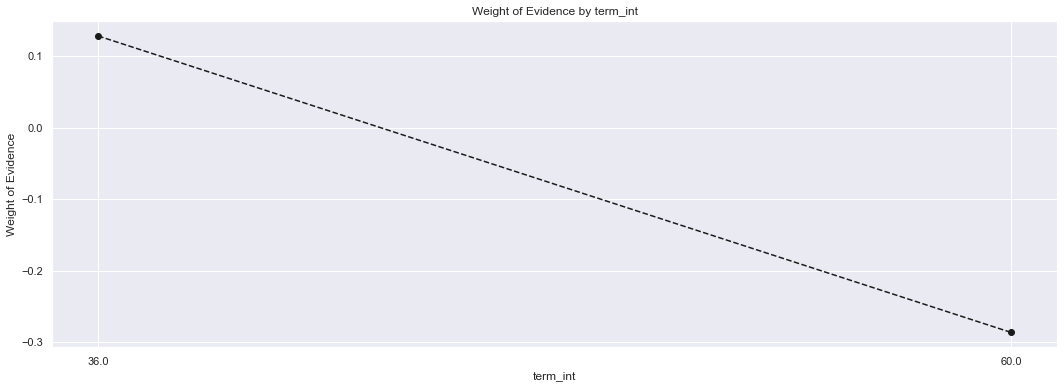

In [393]:
plot_by_woe(df_temp)

In [ ]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [399]:
for col in X_prepr.columns:
    print('WoE and IV for column: {}'.format(col))
    df = woe_ordered_continuous(X_prepr, col, y_prepr)
    print(df)
    #print('IV score: {:.2f}'.format(iv))
    print('\n')

WoE and IV for column: earliest_cr_line_date
    earliest_cr_line_date  n_obs          prop_good         prop_n_obs  \
0              1969-01-01      9  0.888888888888889  0.000096512675331   
1              1969-02-01      6  1.000000000000000  0.000064341783554   
2              1969-03-01      3  1.000000000000000  0.000032170891777   
3              1969-04-01      3  1.000000000000000  0.000032170891777   
4              1969-05-01      4  1.000000000000000  0.000042894522369   
..                    ...    ...                ...                ...   
600            2068-08-01      3  0.333333333333333  0.000032170891777   
601            2068-09-01      4  1.000000000000000  0.000042894522369   
602            2068-10-01      5  0.600000000000000  0.000053618152962   
603            2068-11-01      1  1.000000000000000  0.000010723630592   
604            2068-12-01      2  1.000000000000000  0.000021447261185   

     n_good  n_bad        prop_n_good         prop_n_bad          

        member_id  n_obs  prop_good         prop_n_obs  n_good  n_bad  \
0         70626.0      1        1.0  0.000010723055642     1.0    0.0   
1         70694.0      1        0.0  0.000010723055642     0.0    1.0   
2         72194.0      1        1.0  0.000010723055642     1.0    0.0   
3         72816.0      1        1.0  0.000010723055642     1.0    0.0   
4         73890.0      1        1.0  0.000010723055642     1.0    0.0   
...           ...    ...        ...                ...     ...    ...   
93252  40603936.0      1        1.0  0.000010723055642     1.0    0.0   
93253  40603969.0      1        1.0  0.000010723055642     1.0    0.0   
93254  40604288.0      1        1.0  0.000010723055642     1.0    0.0   
93255  40604427.0      1        1.0  0.000010723055642     1.0    0.0   
93256  40604701.0      1        1.0  0.000010723055642     1.0    0.0   

             prop_n_good         prop_n_bad  WoE  diff_prop_good  diff_WoE  \
0      0.000012038474966  0.000000000000000  

[51623 rows x 12 columns]


WoE and IV for column: emp_length
    emp_length  n_obs          prop_good         prop_n_obs   n_good  \
0          0.0   5968  0.892593833780161  0.063995196071072   5327.0   
1          1.0  29804  0.900516709166555  0.319589950352252  26839.0   
2          2.0   8295  0.887402049427366  0.088947746549857   7361.0   
3          3.0   7391  0.889324854552834  0.079254104249547   6573.0   
4          4.0   5555  0.889468946894689  0.059566574090953   4941.0   
5          5.0   6172  0.886260531432275  0.066182699422027   5470.0   
6          6.0   5225  0.878851674641148  0.056027965729114   4592.0   
7          7.0   5131  0.893587994542974  0.055019998498772   4585.0   
8          8.0   4542  0.890136503742845  0.048704118725672   4043.0   
9          9.0   3621  0.892847279756973  0.038828184479449   3233.0   
10        10.0   7353  0.880456956344349  0.078846628135153   6474.0   
11        11.0   4200  0.864047619047619  0.045036833696130   3629.0   

 

[24924 rows x 12 columns]


WoE and IV for column: purpose
    purpose  n_obs          prop_good         prop_n_obs   n_good  \
0       0.0   1072  0.916044776119403  0.011495115648155    982.0   
1       1.0  20576  0.916504665629860  0.220637592888469  18858.0   
2       2.0  55012  0.885915800189050  0.589896736974168  48736.0   
3       3.0     89  0.752808988764045  0.000954351952132     67.0   
4       4.0   5299  0.906397433478015  0.056821471846617   4803.0   
5       5.0    439  0.858769931662870  0.004707421426810    377.0   
6       6.0   1991  0.900552486187845  0.021349603783094   1793.0   
7       7.0    918  0.857298474945534  0.009843765079297    787.0   
8       8.0    602  0.878737541528239  0.006455279496445    529.0   
9       9.0   4806  0.861007074490221  0.051535005415143   4138.0   
10     10.0     70  0.771428571428571  0.000750613894936     54.0   
11     11.0   1431  0.777078965758211  0.015344692623610   1112.0   
12     12.0    496  0.881048387096774  0.005

53                NaN  inf  


WoE and IV for column: pub_rec
               pub_rec  n_obs          prop_good         prop_n_obs   n_good  \
0    0.000000000000000  80918  0.889171754121456  0.867688216434155  71950.0   
1    0.160564153598023      5  1.000000000000000  0.000053615278210      5.0   
2    1.000000000000000  10670  0.901124648547329  0.114415003699454   9615.0   
3    2.000000000000000   1097  0.904284412032817  0.011763192039203    992.0   
4    3.000000000000000    331  0.900302114803625  0.003549331417481    298.0   
5    4.000000000000000    112  0.857142857142857  0.001200982231897     96.0   
6    5.000000000000000     73  0.904109589041096  0.000782783061861     66.0   
7    6.000000000000000     19  0.894736842105263  0.000203738057197     17.0   
8    7.000000000000000     14  0.785714285714286  0.000150122778987     11.0   
9    8.000000000000000      5  0.800000000000000  0.000053615278210      4.0   
10   9.000000000000000      2  1.000000000000000  0.000021

                 total_pymnt  n_obs  prop_good         prop_n_obs  n_good  \
0          0.000000000000000     18        0.0  0.000193015001555     0.0   
1         44.920000000000002      1        0.0  0.000010723055642     0.0   
2         74.920000000000002      1        0.0  0.000010723055642     0.0   
3         78.930000000000007      1        0.0  0.000010723055642     0.0   
4         79.209999999999994      1        0.0  0.000010723055642     0.0   
...                      ...    ...        ...                ...     ...   
81230  55045.768850000000384      1        1.0  0.000010723055642     1.0   
81231  55100.348649999999907      1        1.0  0.000010723055642     1.0   
81232  55145.009899999997288      1        1.0  0.000010723055642     1.0   
81233  55876.072670000001381      1        1.0  0.000010723055642     1.0   
81234  56809.051630000001751      1        1.0  0.000010723055642     1.0   

       n_bad        prop_n_good         prop_n_bad  WoE  diff_prop_good  \


[4781 rows x 12 columns]


WoE and IV for column: collection_recovery_fee
      collection_recovery_fee  n_obs          prop_good         prop_n_obs  \
0           0.000000000000000  88603  0.937519045630509  0.950094899042431   
1           0.045000000000000      1  0.000000000000000  0.000010723055642   
2           0.071099997000000      1  0.000000000000000  0.000010723055642   
3           0.160000000000000      1  0.000000000000000  0.000010723055642   
4           0.180000000000000      1  0.000000000000000  0.000010723055642   
...                       ...    ...                ...                ...   
4415     3988.809999999999945      1  0.000000000000000  0.000010723055642   
4416     4105.920000000000073      1  0.000000000000000  0.000010723055642   
4417     4146.465600000000450      1  0.000000000000000  0.000010723055642   
4418     4250.049299999999675      1  0.000000000000000  0.000010723055642   
4419     4254.909999999999854      1  0.000000000000000  0.000010723

      tot_coll_amt  n_obs          prop_good         prop_n_obs   n_good  \
0              0.0  69321  0.898241514115492  0.743332940154626  62267.0   
1              3.0      1  1.000000000000000  0.000010723055642      1.0   
2              7.0      1  1.000000000000000  0.000010723055642      1.0   
3             10.0      3  1.000000000000000  0.000032169166926      3.0   
4             12.0      1  1.000000000000000  0.000010723055642      1.0   
...            ...    ...                ...                ...      ...   
2690       66704.0      1  1.000000000000000  0.000010723055642      1.0   
2691       70093.0      1  0.000000000000000  0.000010723055642      0.0   
2692       70317.0      1  1.000000000000000  0.000010723055642      1.0   
2693       71495.0      1  1.000000000000000  0.000010723055642      1.0   
2694       95806.0      1  0.000000000000000  0.000010723055642      0.0   

                     n_bad        prop_n_good         prop_n_bad  \
0     7054.00000000

   grade:D  n_obs          prop_good         prop_n_obs   n_good  \
0      0.0  77867  0.899906250401325  0.834972173670609  70073.0   
1      1.0  15390  0.844314489928525  0.165027826329391  12994.0   

                  n_bad        prop_n_good       prop_n_bad  \
0  7794.000000000000909  0.843572056291909  0.7648675171737   
1  2396.000000000000455  0.156427943708091  0.2351324828263   

                 WoE   diff_prop_good          diff_WoE                 IV  
0  0.097942685034351              NaN               NaN  0.039784854629686  
1 -0.407553631638459  0.0555917604728  0.50549631667281  0.039784854629686  


WoE and IV for column: grade:E
   grade:E  n_obs          prop_good         prop_n_obs   n_good  \
0      0.0  86112  0.897830732069863  0.923383767438369  77314.0   
1      1.0   7145  0.805178446466060  0.076616232561631   5753.0   

                  n_bad        prop_n_good         prop_n_bad  \
0  8797.999999999998181  0.930742653520652  0.863395485770363   
1  139

   sub_grade:C2  n_obs          prop_good         prop_n_obs   n_good  \
0           0.0  87872  0.890704661325564  0.942256345368176  78268.0   
1           1.0   5385  0.891179201485608  0.057743654631824   4799.0   

                  n_bad        prop_n_good         prop_n_bad  \
0  9603.999999999998181  0.942227358638208  0.942492639842983   
1   586.000000000000114  0.057772641361792  0.057507360157017   

                 WoE     diff_prop_good           diff_WoE                 IV  
0 -0.000281507286749                NaN                NaN  0.000001295605742  
1  0.004602388437637  0.000474540160044  0.004883895724387  0.000001295605742  


WoE and IV for column: sub_grade:C3
   sub_grade:C3  n_obs          prop_good         prop_n_obs   n_good  \
0           0.0  88206  0.891379271251389  0.945837845952583  78625.0   
1           1.0   5051  0.879429815878044  0.054162154047417   4442.0   

                  n_bad        prop_n_good         prop_n_bad  \
0  9580.9999999999963

   sub_grade:F3  n_obs          prop_good         prop_n_obs   n_good  \
0           0.0  92689  0.891475795401828  0.993909304395380  82630.0   
1           1.0    568  0.769366197183099  0.006090695604619    437.0   

                   n_bad        prop_n_good         prop_n_bad  \
0  10058.999999999998181  0.994739186439862  0.987144259077527   
1    130.999999999999972  0.005260813560138  0.012855740922473   

                 WoE     diff_prop_good           diff_WoE                 IV  
0  0.007664390717297                NaN                NaN  0.006844314483526  
1 -0.893504791949156  0.122109598218729  0.901169182666453  0.006844314483526  


WoE and IV for column: sub_grade:F4
   sub_grade:F4  n_obs          prop_good         prop_n_obs   n_good  \
0           0.0  92814  0.891331049195164  0.995249686350622  82728.0   
1           1.0    443  0.765237020316027  0.004750313649378    339.0   

                   n_bad        prop_n_good         prop_n_bad  \
0  10086.00000000

   verification_status:Not Verified  n_obs          prop_good  \
0                               0.0  63604  0.883199169863531   
1                               1.0  29653  0.906889690756416   

         prop_n_obs   n_good                 n_bad        prop_n_good  \
0  0.68202923104968  56175.0  7428.999999999997272  0.676261331214562   
1  0.31797076895032  26892.0  2760.999999999999091  0.323738668785438   

          prop_n_bad                WoE     diff_prop_good           diff_WoE  \
0  0.729048086359176 -0.075160105941871                NaN                NaN   
1  0.270951913640824  0.177995247815178  0.023690520892885  0.253155353757049   

                  IV  
0  0.013363249672321  
1  0.013363249672321  


WoE and IV for column: verification_status:Source Verified
   verification_status:Source Verified  n_obs          prop_good  \
0                                  0.0  63294  0.888362246026480   
1                                  1.0  29963  0.895738076961586   

     

   purpose:educational  n_obs          prop_good         prop_n_obs   n_good  \
0                  0.0  93168  0.890863815902456  0.999045648047868  83000.0   
1                  1.0     89  0.752808988764045  0.000954351952132     67.0   

                   n_bad        prop_n_good        prop_n_bad  \
0  10168.000000000000000  0.999193422177279  0.99784102060844   
1     22.000000000000004  0.000806577822721  0.00215897939156   

                 WoE     diff_prop_good           diff_WoE                 IV  
0  0.001354410065850                NaN                NaN  0.001333393440201  
1 -0.984590497810945  0.138054827138411  0.985944907876795  0.001333393440201  


WoE and IV for column: purpose:home_improvement
   purpose:home_improvement  n_obs          prop_good         prop_n_obs  \
0                       0.0  87958  0.889788308056118  0.943178528153383   
1                       1.0   5299  0.906397433478015  0.056821471846617   

    n_good                 n_bad        prop

1 -0.034160407325247  0.003395935625291  0.034432812770204  0.000009305473741  


WoE and IV for column: addr_state:AZ
   addr_state:AZ  n_obs          prop_good         prop_n_obs   n_good  \
0            0.0  91190  0.890777497532624  0.977835443988119  81230.0   
1            1.0   2067  0.888727624576681  0.022164556011881   1837.0   

                  n_bad        prop_n_good         prop_n_bad  \
0  9960.000000000005457  0.977885321487474  0.977428851815505   
1   229.999999999999972  0.022114678512526  0.022571148184495   

                 WoE     diff_prop_good           diff_WoE                 IV  
0  0.000466901622761                NaN                NaN  0.000009539206969  
1 -0.020430887551664  0.002049872955943  0.020897789174425  0.000009539206969  


WoE and IV for column: addr_state:CA
   addr_state:CA  n_obs          prop_good         prop_n_obs   n_good  \
0            0.0  79006  0.890970306052705  0.847185734046774  70392.0   
1            1.0  14251  0.88941126

   addr_state:KY  n_obs          prop_good         prop_n_obs   n_good  \
0            0.0  92406  0.890559054606844  0.990874679648713  82293.0   
1            1.0    851  0.909518213866040  0.009125320351287    774.0   

                   n_bad        prop_n_good         prop_n_bad  \
0  10113.000000000000000  0.990682220376323  0.992443572129539   
1     77.000000000000028  0.009317779623677  0.007556427870461   

                 WoE     diff_prop_good           diff_WoE                 IV  
0 -0.001776339375966                NaN                NaN  0.000372177372322  
1  0.209525787892448  0.018959159259196  0.211302127268414  0.000372177372322  


WoE and IV for column: addr_state:LA
   addr_state:LA  n_obs          prop_good         prop_n_obs   n_good  \
0            0.0  92127  0.890911459181348  0.987882947124613  82077.0   
1            1.0   1130  0.876106194690266  0.012117052875387    990.0   

                   n_bad        prop_n_good         prop_n_bad  \
0  10049.9


WoE and IV for column: addr_state:NJ
   addr_state:NJ  n_obs          prop_good         prop_n_obs   n_good  \
0            0.0  89581  0.891360891260424  0.960582047460244  79849.0   
1            1.0   3676  0.875408052230686  0.039417952539756   3218.0   

                  n_bad       prop_n_good         prop_n_bad  \
0  9732.000000000001819  0.96126018755944  0.955053974484789   
1   458.000000000000057  0.03873981244056  0.044946025515211   

                 WoE     diff_prop_good           diff_WoE                 IV  
0  0.006477262336203                NaN                NaN  0.000962408525561  
1 -0.148594520405451  0.015952839029738  0.155071782741654  0.000962408525561  


WoE and IV for column: addr_state:NM
   addr_state:NM  n_obs          prop_good         prop_n_obs   n_good  \
0            0.0  92744  0.890742258259294  0.994499072455687  82611.0   
1            1.0    513  0.888888888888889  0.005500927544313    456.0   

                   n_bad        prop_n_good 

   addr_state:VT  n_obs          prop_good         prop_n_obs   n_good  \
0            0.0  93079  0.890673513896797  0.998091296095735  82903.0   
1            1.0    178  0.921348314606742  0.001908703904265    164.0   

                   n_bad        prop_n_good         prop_n_bad  \
0  10175.999999999996362  0.998025690105577  0.998626104023552   
1     13.999999999999995  0.001974309894423  0.001373895976447   

                 WoE     diff_prop_good           diff_WoE                 IV  
0 -0.000601420776360                NaN                NaN  0.000218052235616  
1  0.362568434365345  0.030674800709944  0.363169855141705  0.000218052235616  


WoE and IV for column: addr_state:WA
   addr_state:WA  n_obs          prop_good         prop_n_obs   n_good  \
0            0.0  91112  0.890519360786724  0.976999045648048  81137.0   
1            1.0   2145  0.899766899766900  0.023000954351952   1930.0   

                  n_bad        prop_n_good         prop_n_bad  \
0  9975.000

In [ ]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [ ]:
df_inputs_prepr['emp_length_int'].unique()

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp

In [ ]:
plot_by_woe(df_temp)

In [ ]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 2

In [ ]:
df_inputs_prepr['mths_since_issue_d'].unique()

In [ ]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)

In [ ]:
df_inputs_prepr['mths_since_issue_d_factor']

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
df_temp

In [ ]:
plot_by_woe(df_temp)

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
plot_by_woe(df_temp.iloc[3: , : ], 90)

In [ ]:
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [ ]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [ ]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

In [ ]:
plot_by_woe(df_temp, 90)

### Data Preparation: Continuous Variables, Part 1 and 2: Homework

In [ ]:
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
plot_by_woe(df_temp.iloc[6: , : ], 90)

In [ ]:
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp

In [ ]:
plot_by_woe(df_temp)

In [ ]:
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

In [ ]:
plot_by_woe(df_temp)

In [ ]:
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)

In [ ]:
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [ ]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

In [ ]:
plot_by_woe(df_temp)

In [ ]:
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [ ]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

In [ ]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [ ]:
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [ ]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

In [ ]:
plot_by_woe(df_temp, 90)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

In [ ]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

In [ ]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

In [ ]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]

In [ ]:
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [ ]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3: Homework

In [ ]:
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [ ]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [ ]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>=86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 86), 1, 0)

### Preprocessing the Test Dataset

In [ ]:
#loan_data_inputs_train = df_inputs_prepr
loan_data_inputs_test = df_inputs_prepr

In [ ]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
loan_data_targets_train.to_csv('loan_data_targets_train.csv')
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')